# Proyek Analisis Data: [PRSA_Data_Aotizhongxin_20130301-20170228 & PRSA_Data_Changping_20130301-20170228]
- **Nama:** M Fajrin Wirattama
- **Email:** fajrinwirattama21@gmail.com
- **ID Dicoding:** wirattama

## Menentukan Pertanyaan Bisnis

- Bagaimana tren konsentrasi PM2.5 dan PM10 di Stasiun Aotizhongxin dan Changping dalam periode Maret 2013 hingga Februari 2017?

- Bagaimana pola tahunan dari konsentrasi gas polutan CO dan NO2 pada kedua stasiun selama periode pengamatan?

## Import Semua Packages/Library yang Digunakan

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, zipfile

## Data Wrangling

### Gathering Data

In [58]:
# Membaca data Aotizhongxin
Aotizhongxin = pd.read_csv("Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
print("Data Aotizhongxin:")
print(Aotizhongxin)

Data Aotizhongxin:
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  

In [59]:
# Membaca data Changping
Changping = pd.read_csv("Data/PRSA_Data_Changping_20130301-20170228.csv")
print("Data Changping:")
print(Changping)

Data Changping:
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    s

In [60]:
# Menggabungkan data yang akan digunakan
# Pilih kolom digunakan untuk menjawab pertanyaan bisnis
data = ["year", "month", "day", "hour", "PM2.5", "PM10", "NO2", "CO", "station"]
df1 = Aotizhongxin[data]
df2 = Changping[data]

# Gabungkan kedua dataframe
merged_data = pd.concat([df1, df2], ignore_index=True)
merged_data.to_csv("merged_data.csv", index=False)
print("\nData yang telah digabungkan:")
print(merged_data.head())


Data yang telah digabungkan:
   year  month  day  hour  PM2.5  PM10   NO2     CO       station
0  2013      3    1     0    4.0   4.0   7.0  300.0  Aotizhongxin
1  2013      3    1     1    8.0   8.0   7.0  300.0  Aotizhongxin
2  2013      3    1     2    7.0   7.0  10.0  300.0  Aotizhongxin
3  2013      3    1     3    6.0   6.0  11.0  300.0  Aotizhongxin
4  2013      3    1     4    3.0   3.0  12.0  300.0  Aotizhongxin


**Insight:**
- Data-data yang digunakan pada analisis ini adalah data dari stasiun Aotizhongxin dan Changping dengan variabel yang digunakan adalah year, month, day, hour, PM2.5, PM10,  NO2, CO dan station.
- Data telah berhasil dikumpulkan dari dua sumber yang berbeda dan telah digabungkan dalam satu DataFrame dalam file merged_data.

### Assessing Data

In [61]:
print("Info Data Aotizhongxin:")
Aotizhongxin.info()
print("\nInfo Data Changping:")
Changping.info()
print("\nInfo Merged Data:")
merged_data.info()

Info Data Aotizhongxin:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

Info Data Changping:
<class 'pandas.core.fr

In [63]:
print("\nJumlah nilai yang hilang di Merged Data:")
print(merged_data.isnull().sum())

print("\nJumlah duplikasi di Merged Data:")
print(merged_data.duplicated().sum())

print("\nStatistik deskriptif Merged Data:")
print(merged_data.describe(include='all'))


Jumlah nilai yang hilang di Merged Data:
year          0
month         0
day           0
hour          0
PM2.5      1699
PM10       1300
NO2        1690
CO         3297
station       0
dtype: int64

Jumlah duplikasi di Merged Data:
0

Statistik deskriptif Merged Data:
                year         month           day          hour         PM2.5  \
count   70128.000000  70128.000000  70128.000000  70128.000000  68429.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     2014.662560      6.522930     15.729637     11.500000     76.923797   
std         1.177205      3.448728      8.800155      6.922236     77.595355   
min      2013.000000      1.000000      1.000000      0.000000      2.000000   
25%      2014.000000      4.000000      8.000000      5.750000     20.000000   
50%      2

**Insight:**
- Dari data yang telah digabung terdapat nilai yang hilang pada kolom-kolom polutan, yaitu PM2.5 (1699 baris hilang), PM10 (1300 baris hilang), NO2 (1690 baris hilang), dan CO (3297 baris hilang). Sementara itu, padam kolom year, month, day dan hour tidak memiliki nilai yang hilang, yang cocok untuk pembentukan kolom datetime untuk analisis tren berbasis waktu.
- Pada data merged_data tidak terdapat baris yang duplikat sehingga dapat dilanjutkan ke tahap selanjutnya.

### Cleaning Data

In [47]:
# Menangani missing values: Menggunakan dropna()
mdc = merged_data.dropna()
print("\nJumlah nilai yang hilang setelah dropna():")
print(mdc.isnull().sum())


Jumlah nilai yang hilang setelah dropna():
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
NO2        0
CO         0
station    0
dtype: int64


In [49]:
# Konfirmasi deskripsi setelah pembersihan
print("\nStatistik deskriptif setelah pembersihan data:")
print(mdc_clean.describe())

# Membuat kolom datetime untuk analisis berbasis waktu yang lebih baik
mdc_clean['datetime'] = pd.to_datetime(mdc_clean[['year', 'month', 'day', 'hour']])
print("\nMerged Data dengan kolom datetime:")
print(mdc_clean.head())
print(mdc_clean.info())


Statistik deskriptif setelah pembersihan data:
               year         month           day          hour         PM2.5  \
count  65806.000000  65806.000000  65806.000000  65806.000000  65806.000000   
mean    2014.705589      6.473194     15.643589     11.511853     76.338063   
std        1.168633      3.457476      8.774742      6.939725     76.129871   
min     2013.000000      1.000000      1.000000      0.000000      3.000000   
25%     2014.000000      3.000000      8.000000      6.000000     20.000000   
50%     2015.000000      7.000000     16.000000     11.000000     52.000000   
75%     2016.000000      9.000000     23.000000     18.000000    107.000000   
max     2017.000000     12.000000     31.000000     23.000000    713.000000   

               PM10           NO2            CO  
count  65806.000000  65806.000000  65806.000000  
mean     101.837627     51.787882   1209.051804  
std       88.688525     34.340670   1168.142475  
min        2.000000      2.000000    100

**Insight:**
- Setelah melakukan dropna(), dataset mdc_clean kini sudah tidak ada data yang hilang.

- Terdapat penambahan kolom datetime yang berasal dari gabungan kolom year, month, day, dan hour, untuk menganalisis tren dan pola musiman polutan agar lebih efisien.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Akumulasi rata-rata PM2.5 dan PM10 per tahun berdasarkan stasiun
pm_yearly_avg_by_station = mdc_clean.groupby(['year', 'station'])[['PM2.5', 'PM10']].mean().reset_index()
print("\nRata-rata tahunan PM2.5 dan PM10 per stasiun:")
print(pm_yearly_avg_by_station)

# Distribusi PM2.5 dan PM10 (Univariate Analysis) secara keseluruhan dan per stasiun
print("\nStatistik deskriptif PM2.5 (Keseluruhan):")
print(mdc_clean['PM2.5'].describe())
print("\nStatistik deskriptif PM10 (Keseluruhan):")
print(mdc_clean['PM10'].describe())

for station in mdc_clean['station'].unique():
    print(f"\nStatistik deskriptif PM2.5 di {station}:")
    print(mdc_clean[mdc_clean['station'] == station]['PM2.5'].describe())
    print(f"\nStatistik deskriptif PM10 di {station}:")
    print(mdc_clean[mdc_clean['station'] == station]['PM10'].describe())

# Korelasi antara PM2.5 dan PM10 (Multivariate Analysis) per stasiun
for station in mdc_clean['station'].unique():
    print(f"\nKorelasi antara PM2.5 dan PM10 di {station}:")
    print(mdc_clean[mdc_clean['station'] == station][['PM2.5', 'PM10']].corr())


Rata-rata tahunan PM2.5 dan PM10 per stasiun:
   year       station      PM2.5        PM10
0  2013  Aotizhongxin  83.503653  114.333903
1  2013     Changping  70.980851   90.432030
2  2014  Aotizhongxin  90.418474  121.843648
3  2014     Changping  79.303428  106.285655
4  2015  Aotizhongxin  79.773087  109.631648
5  2015     Changping  69.494433   93.829554
6  2016  Aotizhongxin  73.785824   94.135263
7  2016     Changping  61.051091   85.799253
8  2017  Aotizhongxin  95.008708  107.714804
9  2017     Changping  79.563218   93.813218

Statistik deskriptif PM2.5 (Keseluruhan):
count    65806.000000
mean        76.338063
std         76.129871
min          3.000000
25%         20.000000
50%         52.000000
75%        107.000000
max        713.000000
Name: PM2.5, dtype: float64

Statistik deskriptif PM10 (Keseluruhan):
count    65806.000000
mean       101.837627
std         88.688525
min          2.000000
25%         35.000000
50%         79.000000
75%        142.000000
max        992.

In [ ]:
# Akumulasi rata-rata CO dan NO2 per bulan per stasiun
co_no2_monthly_avg_by_station = mdc_clean.groupby(['month', 'station'])[['CO', 'NO2']].mean().reset_index()
print("\nRata-rata bulanan CO dan NO2 per stasiun:")
print(co_no2_monthly_avg_by_station)

# Akumulasi rata-rata CO dan NO2 per jam (untuk melihat pola harian, jika relevan)
co_no2_hourly_avg_by_station = mdc_clean.groupby(['hour', 'station'])[['CO', 'NO2']].mean().reset_index()
print("\nRata-rata jam CO dan NO2 per stasiun (head):")
print(co_no2_hourly_avg_by_station.head())


Rata-rata bulanan CO dan NO2 per stasiun:
    month       station           CO        NO2
0       1  Aotizhongxin  1953.886190  66.512283
1       1     Changping  1866.377816  57.656222
2       2  Aotizhongxin  1436.208207  53.601824
3       2     Changping  1383.605934  48.182199
4       3  Aotizhongxin  1385.512394  63.901877
5       3     Changping  1250.567278  55.238153
6       4  Aotizhongxin   849.369638  53.178217
7       4     Changping   778.238304  41.353068
8       5  Aotizhongxin   786.376939  48.122109
9       5     Changping   702.548043  34.437189
10      6  Aotizhongxin   926.479030  47.896499
11      6     Changping   781.672629  29.461314
12      7  Aotizhongxin   827.067502  47.894572
13      7     Changping   818.660080  26.944749
14      8  Aotizhongxin   776.165803  48.472872
15      8     Changping   729.278351  27.676701
16      9  Aotizhongxin   916.496012  59.438760
17      9     Changping   837.415379  37.458720
18     10  Aotizhongxin  1188.468404  74.7665

**Insight:**
- pm_yearly_avg_by_station adalah akumulasi utama untuk memvisualisasikan tren PM2.5 dan PM10 yang terpisah berdasarkan stasiun. hal ini akan menunjukan apakah terdapat adanya perbedaan yang signifikan tingkat polusi antar Stasiun Aotizhongxin dan Stasiun Changping.
- Sama seperti pm_yearly_avg_by_station,  co_no2_monthly_avg_by_station adalah akumulasi utama untuk memvisualisasikan pola dari CO dan NO2 di kedua stasiun dengan melihat rata-rata perbulan, serta memberikan gambaran lebih dari pola harian yang bisa jadi relvan dengan pola tahunannya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana tren konsentrasi PM2.5 dan PM10 di Stasiun Aotizhongxin dan Changping dalam periode Maret 2013 hingga Februari 2017?

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\astennu\AppData\Local\Temp\ipykernel_45476\3645375431.py:9: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_ylabel("Konsentrasi Rata-rata ($\mu g/m^3$)")


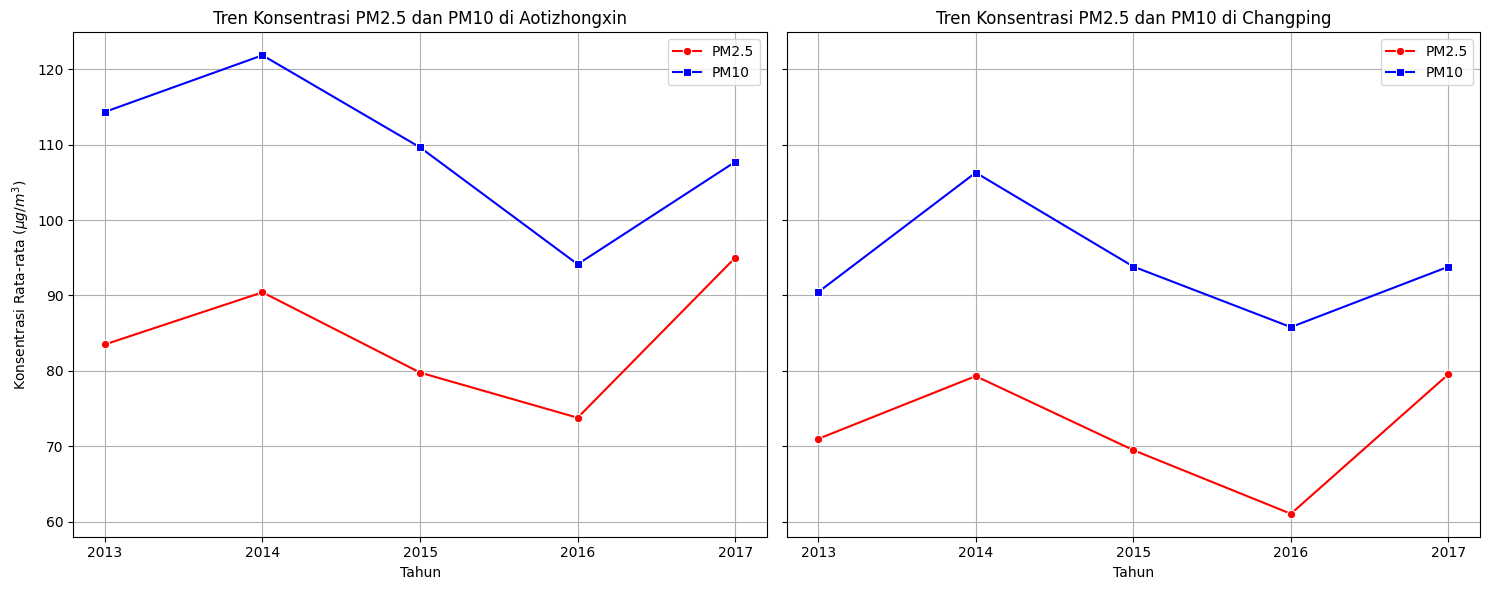

In [66]:
# Menggunakan data pm_yearly_avg_by_station dari EDA
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True) # Sharey=True agar skala Y sama

# Plot untuk Stasiun Aotizhongxin
aotizhongxin_pm = pm_yearly_avg_by_station[pm_yearly_avg_by_station['station'] == 'Aotizhongxin']
sns.lineplot(x='year', y='PM2.5', data=aotizhongxin_pm, marker='o', label='PM2.5', color='red', ax=axes[0])
sns.lineplot(x='year', y='PM10', data=aotizhongxin_pm, marker='s', label='PM10', color='blue', ax=axes[0])
axes[0].set_xlabel("Tahun")
axes[0].set_ylabel("Konsentrasi Rata-rata ($\mu g/m^3$)")
axes[0].set_title("Tren Konsentrasi PM2.5 dan PM10 di Aotizhongxin")
axes[0].set_xticks(aotizhongxin_pm['year'])
axes[0].grid(True)
axes[0].legend()

# Plot untuk Stasiun Changping
changping_pm = pm_yearly_avg_by_station[pm_yearly_avg_by_station['station'] == 'Changping']
sns.lineplot(x='year', y='PM2.5', data=changping_pm, marker='o', label='PM2.5', color='red', ax=axes[1])
sns.lineplot(x='year', y='PM10', data=changping_pm, marker='s', label='PM10', color='blue', ax=axes[1])
axes[1].set_xlabel("Tahun")
axes[1].set_title("Tren Konsentrasi PM2.5 dan PM10 di Changping")
axes[1].set_xticks(changping_pm['year'])
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

### Pertanyaan 2:  Bagaimana pola tahunan dari konsentrasi gas polutan CO dan NO2 pada kedua stasiun selama periode pengamatan?

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\astennu\AppData\Local\Temp\ipykernel_45476\4253948704.py:9: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_ylabel("Konsentrasi Rata-rata ($\mu g/m^3$)")


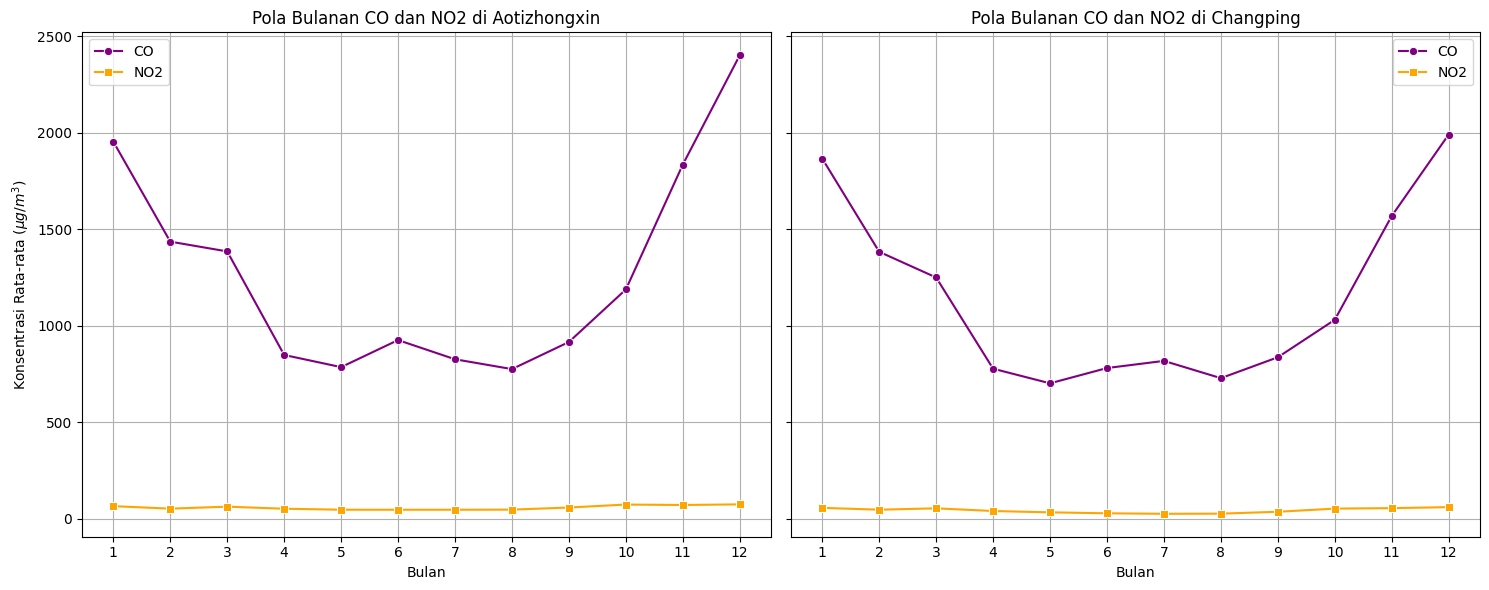

In [67]:
# Menggunakan data co_no2_monthly_avg_by_station dari EDA
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot pola bulanan untuk Stasiun Aotizhongxin
aotizhongxin_gas = co_no2_monthly_avg_by_station[co_no2_monthly_avg_by_station['station'] == 'Aotizhongxin']
sns.lineplot(x='month', y='CO', data=aotizhongxin_gas, marker='o', label='CO', color='purple', ax=axes[0])
sns.lineplot(x='month', y='NO2', data=aotizhongxin_gas, marker='s', label='NO2', color='orange', ax=axes[0])
axes[0].set_xlabel("Bulan")
axes[0].set_ylabel("Konsentrasi Rata-rata ($\mu g/m^3$)")
axes[0].set_title("Pola Bulanan CO dan NO2 di Aotizhongxin")
axes[0].set_xticks(range(1, 13)) # Menampilkan semua bulan (1-12)
axes[0].grid(True)
axes[0].legend()

# Plot pola bulanan untuk Stasiun Changping
changping_gas = co_no2_monthly_avg_by_station[co_no2_monthly_avg_by_station['station'] == 'Changping']
sns.lineplot(x='month', y='CO', data=changping_gas, marker='o', label='CO', color='purple', ax=axes[1])
sns.lineplot(x='month', y='NO2', data=changping_gas, marker='s', label='NO2', color='orange', ax=axes[1])
axes[1].set_xlabel("Bulan")
axes[1].set_title("Pola Bulanan CO dan NO2 di Changping")
axes[1].set_xticks(range(1, 13))
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

## Conclusion

- Kesimpulan pertanyaan 1: Berdasarkan analisis tren tahunan PM2.5 dan PM10 di Stasiun Aotizhongxin dan Changping, terlihat bahwa kedua stasiun, Aotizhongxin dan Changping, menunjukkan tren serupa untuk PM2.5 dan PM10, dengan peningkatan konsentrasi dari 2013 ke 2014, penurunan hingga 2016, lalu naik kembali pada 2017. Sepanjang periode pengamatan, PM10 selalu tercatat lebih tinggi dari PM2.5. Secara umum, Aotizhongxin mencatat konsentrasi yang sedikit lebih tinggi dibandingkan Changping, terutama pada 2014, meskipun pola fluktuasinya tetap sejalan di kedua lokasi.


- Kesimpulan pertanyaan 2: Analisis pola bulanan konsentrasi CO dan NO2 menunjukkan pola musiman yang jelas di kedua stasiun. Konsentrasi CO di Aotizhongxin dan Changping menunjukkan pola musiman yang jelas, dengan puncak tertinggi pada awal dan akhir tahun, khususnya Desember, dan titik terendah pada pertengahan tahun (Mei dan agustus). Pola ini serupa di kedua stasiun, meskipun Aotizhongxin mencatat nilai CO sedikit lebih tinggi, terutama di bulan-bulan puncak. Sementara itu, NO2 cenderung stabil sepanjang tahun dengan sedikit peningkatan pada akhir dan awal tahun. Meskipun variasinya tidak sebesar CO, tren musiman NO2 tetap terlihat, dan konsentrasinya di Aotizhongxin juga sedikit lebih tinggi dibandingkan Changping.


